In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from typing import Sequence

In [329]:
class Point(ABC):
    
    def __init__(self, arr: Sequence) -> None:
        self._correct_seq(arr)
        self.array = np.array(arr)
        
    @abstractmethod
    def _correct_seq(self, arr: Sequence) -> None:
        raise NotImplementedError
    
    def get(self, index: int) -> float:
        return self.array[index]
    
    def __getitem__(self, index):
        return self.array[index]
    
    def __setitem__(self, index, value):
        self.array[index] = value
        
    def __add__(self, other):
        new_array = self.array + other.array
        return self.__class__(new_array)  # Создаем новый экземпляр того же класса с новым массивом

    def __sub__(self, other):
        new_array = self.array - other.array
        return self.__class__(new_array)  # Создаем новый экземпляр того же класса с новым массивом

In [330]:



class Point7d(Point):
    
    def _correct_seq(self, arr: Sequence) -> None:
        if len(arr) != 7:
            raise ValueError(f"Размер массива = {len(arr)} не соответсвует ошиданию = {7}")

In [331]:
class Point1d(Point):
    
    def _correct_seq(self, arr: Sequence) -> None:
        if len(arr) != 1:
            raise ValueError(f"Размер массива = {len(arr)} не соответсвует ошиданию = {1}")

In [332]:
class Point2d(Point):
    
    def _correct_seq(self, arr: Sequence) -> None:
        if len(arr) != 2:
            raise ValueError(f"Размер массива = {len(arr)} не соответсвует ошиданию = {2}")

In [333]:
class Func(ABC):
    
    @abstractmethod
    def create_point(self, arr: Sequence) -> Point:
        raise NotImplementedError
    
    @abstractmethod
    def size(self) -> int:
        raise NotImplementedError

    @abstractmethod
    def __call__(self, point: Point) -> float:
        raise NotImplementedError

In [349]:
class Func2d(Func):
    
    def create_point(self, arr: Sequence) -> Point7d:
        return Point2d(arr)
    
    def size(self) -> int:
        return 2
    
    def __call__(self, point: Point7d) -> float:
        return np.abs(np.sum(point.array))

In [335]:

class Func7d(Func):
    
    def create_point(self, arr: Sequence) -> Point7d:
        return Point7d(arr)
    
    def size(self) -> int:
        return 7
    
    def __call__(self, point: Point7d) -> float:
        return np.abs(np.sum(point.array))
        #return point[0] + point[1] * point[2] - point[3] / point[4] + point[5] * point[6]
    

In [336]:
class Func1d(Func):
    
    def create_point(self, arr: Sequence) -> Point7d:
        return Point1d(arr)
    
    def size(self) -> int:
        return 1
    
    def __call__(self, point: Point1d) -> float:
        return point[0] ** 2
        return point[0]**6 + point[0]**4 - 6 * point[0]**3 + point[0]**5 + point[0]**2 + point[0]
    

In [337]:
def is_ok(point: Point) -> bool:
    return True

In [338]:
def random_points(func: Func7d, count_points: int) -> Point7d:
    points = [
        Point7d(np.random.uniform(low=-10, high=10, size=func.size()))
        for _ in range(count_points)
    ]
    
    filtered_points = list(filter(lambda p: is_ok(p), points))
    
    if not filtered_points:
        raise ValueError("Нет подходящих точек после фильтрации")
    
    return min(filtered_points, key=lambda p: func(p))

min_point = random_points(Func7d(), 1000)
print("Минимальная точка:", min_point.array)


Минимальная точка: [-6.19515341 -3.67925858  4.1606283   4.71147142 -6.28903119  2.82037458
  4.49120387]


In [339]:
def random_points(func: Func, count_points: int) -> tuple[Point7d, pd.DataFrame]:
    points = [
        func.create_point(np.random.uniform(low=-10, high=10, size=func.size()))
        for _ in range(count_points)
    ]
    df = pd.DataFrame([point.array for point in points])
    
    filtered_points = list(filter(lambda p: is_ok(p), points))
    
    if not filtered_points:
        raise ValueError("Нет подходящих точек после фильтрации")
    
    return min(filtered_points, key=lambda p: func(p)), df

min_point, df = random_points(Func7d(), 1000)
print("Минимальная точка:", min_point.array)
print(df)

Минимальная точка: [-6.41691546 -0.14285714  1.62538154  3.4968981  -4.03293523  1.98212235
  3.49370775]
            0         1         2         3         4         5         6
0   -2.117557  2.267029 -0.059148  3.872918  2.543128 -3.627424  9.422202
1    7.191639  5.562309  2.947218 -7.975182  6.987667  5.008884  1.349425
2   -0.841851 -4.267547 -7.948192 -6.476184 -6.338796 -6.362220  9.510137
3    0.297589  3.419775  9.031608  4.770297 -1.366775 -0.854609 -9.739712
4   -9.255000  2.655316  8.739177  6.267389 -6.680576 -0.893742 -6.800416
..        ...       ...       ...       ...       ...       ...       ...
995  6.447901  5.272999 -6.420436 -5.481123  2.565577  4.284818 -0.040469
996  3.183341  6.496427 -5.049177 -6.836868  4.483586 -6.748488  5.876360
997 -0.453026 -9.270678  9.374772 -3.105367 -8.746818  4.235445 -2.913677
998  8.727968  5.467237 -6.384152  0.494860 -8.880640 -0.054997  0.499687
999 -6.416915 -0.142857  1.625382  3.496898 -4.032935  1.982122  3.493708

[1000

In [340]:
min_point, df = random_points(Func1d(), 100)
print("Минимальная точка:", min_point.array)
print(df)

Минимальная точка: [0.0422799]
           0
0  -5.231303
1   7.110168
2   1.250733
3  -6.614014
4   1.216129
..       ...
95  9.139083
96 -5.097470
97 -0.123399
98 -2.115827
99  8.467115

[100 rows x 1 columns]


In [341]:
def random_direction(func: Func, eps: float=0.005, step: float=0.1, count_failures: int=1):
    def create_random_vec(size) -> np.ndarray:
        random_vector = np.random.randn(size)
        return random_vector / np.linalg.norm(random_vector)

    random_vector = create_random_vec(func.size())

    point = func.create_point(np.random.rand(func.size()))
    point_new = func.create_point(point.array + step * random_vector)

    f_point = func(point)
    f_new_point = func(point_new)

    count_fails = 0
    while abs(f_point - f_new_point)/2 > eps:
        point = point_new
        point_new = func.create_point(point.array + step * random_vector)
        f_point = func(point)
        f_new_point = func(point_new)
        if f_new_point > f_point:
            count_fails += 1
        else:
            count_fails = 0
            
        if count_fails >= count_failures:
            point = func.create_point(point.array - count_fails * random_vector)
            random_vector = create_random_vec(func.size())
            point_new = func.create_point(point.array + step * random_vector)
            count_fails = 0

    return point_new



In [342]:
point = random_direction(Func1d())
print(point.array)
print(Func1d()(point))

[-0.02581806]
0.0006665723869220015


In [343]:
point = random_direction(Func7d())
print(point.array)
print(Func7d()(point))

[-0.5159444  -1.14612077 -1.11515301  0.27255169  2.03490629  0.22775502
  0.22888615]
0.01311902667269954


In [344]:
def random_direction(func: Func, eps: float=0.005, step: float=0.1, count_failures: int=1) -> tuple[Point, pd.DataFrame]:
    def create_random_vec(size) -> np.ndarray:
        random_vector = np.random.randn(size)
        return random_vector / np.linalg.norm(random_vector)
    
    df = []

    random_vector = create_random_vec(func.size())

    point = func.create_point(np.random.rand(func.size()))
    df.append(point.array)
    point_new = func.create_point(point.array + step * random_vector)

    f_point = func(point)
    f_new_point = func(point_new)

    count_fails = 0
    while abs(f_point - f_new_point)/2 > eps:
        point = point_new
        df.append(point.array)
        point_new = func.create_point(point.array + step * random_vector)
        f_point = func(point)
        f_new_point = func(point_new)
        if f_new_point > f_point:
            count_fails += 1
        else:
            count_fails = 0
            
        if count_fails >= count_failures:
            point = func.create_point(point.array - count_fails * random_vector)
            df.append(point.array)
            random_vector = create_random_vec(func.size())
            point_new = func.create_point(point.array + step * random_vector)
            count_fails = 0

    return point_new, pd.DataFrame(df)

In [364]:
point, df = random_direction(Func2d())
print(point.array)
print(df)
print(Func2d()(point))
df.to_csv('my_data.csv', index=False)

[-0.02337367 -0.00917484]
           0         1
0   0.053224  0.660530
1   0.089278  0.753805
2  -0.271261 -0.178939
3  -0.260745 -0.278385
4  -0.365908  0.716070
5  -0.463166  0.692816
6  -0.560425  0.669562
7  -0.657684  0.646309
8   0.314903  0.878848
9   0.406779  0.918331
10 -0.511976  0.523503
11 -0.516557  0.423608
12 -0.470746  1.422558
13 -0.440921  1.327109
14 -0.411096  1.231660
15 -0.381272  1.136211
16 -0.351447  1.040762
17 -0.321622  0.945314
18 -0.291797  0.849865
19 -0.261972  0.754416
20 -0.232147  0.658967
21 -0.202323  0.563518
22 -0.172498  0.468069
23 -0.142673  0.372621
24 -0.112848  0.277172
25 -0.083023  0.181723
26 -0.053198  0.086274
0.03254851083235252


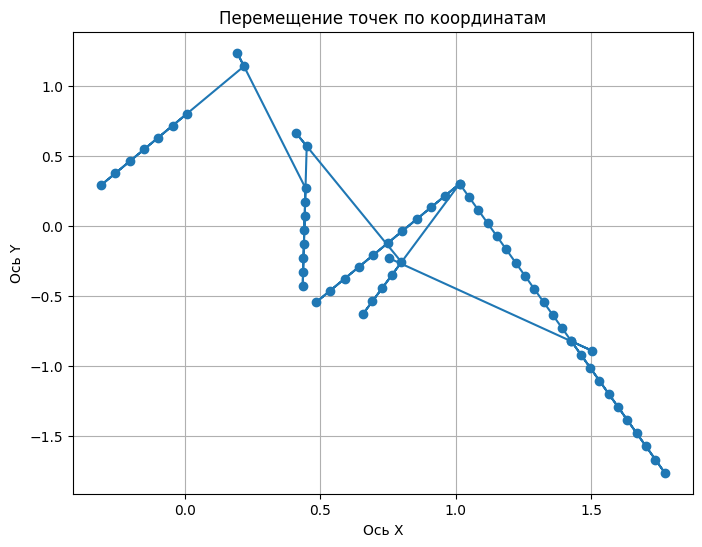

In [363]:
import matplotlib.pyplot as plt

# Разделение данных на отдельные списки для x и y
x_values = df.iloc[:,0]
y_values = df.iloc[:,1]

# Построение графика перемещения точек
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title('Перемещение точек по координатам')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True)
plt.show()

In [ ]:
def random_direction_correting_steps(func: Func, eps: float=0.005, step: float=2, count_failures: int=3):
    def create_random_vec(size) -> np.ndarray:
        random_vector = np.random.randn(size)
        return random_vector / np.linalg.norm(random_vector)

    random_vector = create_random_vec(func.size())

    point = func.create_point(np.random.rand(func.size()))
    point_new = func.create_point(point.array + step * random_vector)

    f_point = func(point)
    f_new_point = func(point_new)

    count_fails = 0
    while abs(f_point - f_new_point)/2 > eps:
        point = point_new
        point_new = func.create_point(point.array + step * random_vector)
        f_point = func(point)
        f_new_point = func(point_new)
        if f_new_point > f_point:
            count_fails += 1
            step /= 2
        else:
            count_fails = 0
            
        if count_fails >= count_failures:
            point = func.create_point(point.array - count_fails * random_vector)
            random_vector = create_random_vec(func.size())
            point_new = func.create_point(point.array + step * random_vector)
            count_fails = 0

    return point_new

In [ ]:
point = random_direction_correting_steps(Func1d())
print(point.array)
print(Func1d()(point))

[-0.06580141]
0.004329826115003054


In [ ]:
point = random_direction_correting_steps(Func7d())
print(point.array)
print(Func7d()(point))

[ 0.23102187 -0.54039701 -0.83265045  1.52906069  1.69991517 -1.56207738
 -0.66298022]
0.13810734226835242


In [373]:
def random_direction_correting_steps(func: Func, eps: float=0.005, step: float=2, count_failures: int=3) -> tuple[Point, pd.DataFrame]:
    def create_random_vec(size) -> np.ndarray:
        random_vector = np.random.randn(size)
        return random_vector / np.linalg.norm(random_vector)

    random_vector = create_random_vec(func.size())

    df = []
    point = func.create_point(np.random.rand(func.size()))
    df.append(point.array)
    point_new = func.create_point(point.array + step * random_vector)

    f_point = func(point)
    f_new_point = func(point_new)

    count_fails = 0
    while abs(f_point - f_new_point)/2 > eps:
        point = point_new
        df.append(point.array)
        point_new = func.create_point(point.array + step * random_vector)
        f_point = func(point)
        f_new_point = func(point_new)
        if f_new_point > f_point:
            count_fails += 1
            step /= 2
        else:
            count_fails = 0
            
        if count_fails >= count_failures:
            point = func.create_point(point.array - count_fails * random_vector)
            df.append(point.array)
            random_vector = create_random_vec(func.size())
            point_new = func.create_point(point.array + step * random_vector)
            count_fails = 0

    return point_new, pd.DataFrame(df)

In [374]:
point, df = random_direction_correting_steps(Func2d())
print(point.array)
print(Func2d()(point))
df.to_csv('my_data2.csv', index=False)

[1.89705653 0.47894626]
2.376002791272249
